In [28]:
using NPZ
using Dierckx: Spline1D, derivative
using Interpolations
using Plots
using ForwardDiff
using Dierckx

In [6]:
XY = npzread("/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/src/hairpin.npy");


In [29]:
function upsample(data...; δp=0.001)
    n = length(data)
    P = range(0, 1, length(data[1]))

    # upsample data
    itp = Interpolations.scale(
        interpolate(hcat(data...), (BSpline(Cubic(Natural(OnGrid()))), NoInterp())), P, 1:n
    )

    tfine = 0:δp:1
    upsampled = []
    for i in 1:n
        push!(upsampled, [itp(t, i) for t in tfine])
    end
    return upsampled
end

upsample (generic function with 1 method)

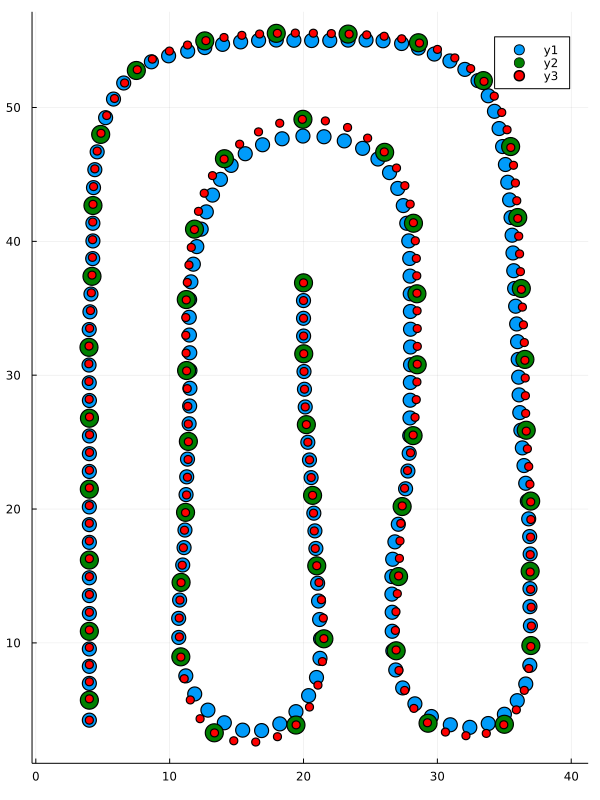

In [166]:
new_XY = XY[1:4:end, :]

new_XY[16,2] += .5
new_XY[16,1] -= .5
new_XY[15,1] -= .5
new_XY[14,1] -= .25
new_XY[13,1] -= .25

new_XY[17,2] += 1.25

new_XY[18,2] += .5
new_XY[18,1] += .5


new_XY[30, 1] += .25
new_XY[31, 1] += .4
new_XY[32, 1] += .5
new_XY[33, 1] += .5
new_XY[34, 1] += .5


new_XY[35, 1] += .6
new_XY[36, 1] += .4
new_XY[37, 2] += .4

new_XY[38, 2] += .45
new_XY[39, 2] += .25
new_XY[39, 2] += .25


# new_XY[40, 2] += .5
# new_XY[41, 1] -= .5
# new_XY[41, 2] += .5

new_XY[6, 1] += .25
new_XY[7, 2] -= 1
new_XY[8, 2] -= .75
new_XY[8, 1] -= .75

new_XY[19, 1] += .5
new_XY[20, 1] += .5
new_XY[21, 1] += .5
new_XY[22, 1] += .25

new_XY[24, 1] += .5
new_XY[25, 1] += .25

new_XY[26, 1] -= .25
new_XY[26, 2] -= .5
new_XY[27, 2] -= .75
# new_XY[27, 1] += .5


new_XY[40, 2] += .5

# new_XY[28, 1] -= 6

X, Y = upsample(new_XY[:, 1], new_XY[:, 2]; δp=.0051)
X = [X..., XY[end, 1]]
Y = [Y..., XY[end, 2]]

# upsample new_XY so that points are equally spaced


plt = scatter(XY[:,1], XY[:,2], aspect_ratio=:equal, size=(600, 800), ms=8)
scatter!(new_XY[:,1], new_XY[:,2], color="green", ms=10)
scatter!(X, Y, color="red", ms=5)

In [167]:
npzwrite("/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/src/hairpin.npy", hcat(X, Y))